coefficients: [ 0.05160246 -0.0075886 ]
absolute error at x = [.25,.5,.75]: [-0.0014713085576522344, 0.0019428575394786068, -0.0009743858487788748]
relative error at x = [.25,.5,.75]: [-0.04844426909048944, 0.03912350552941955, -0.02162830102606814]


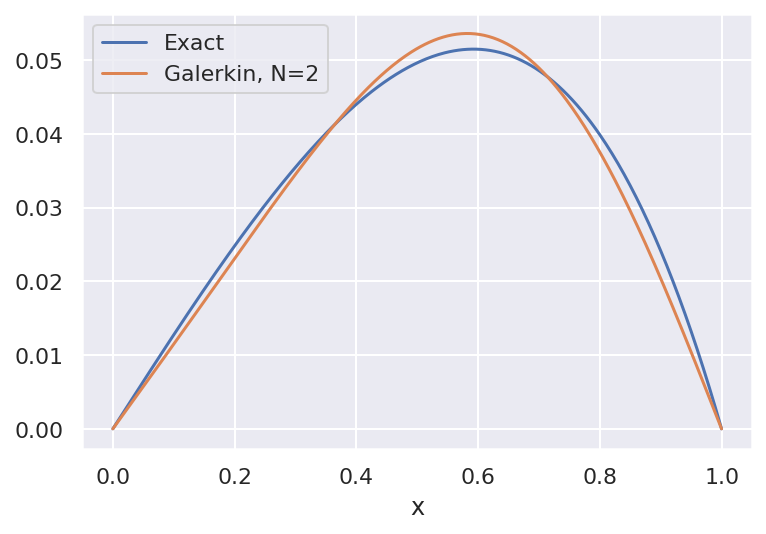

In [30]:
from matplotlib import rcdefaults
rcdefaults()  # restore default matplotlib rc parameters
%config InlineBackend.figure_format='retina'   
import seaborn as sns  # wrapper for matplotlib that provides prettier styles and more
import matplotlib.pyplot as plt  # use matplotlib functionality directly
%matplotlib inline   
sns.set()

import numpy as np

# domain
x0 = 0
x1 = 1
qsize = 100  # ~quarter of grid size
size = 4*qsize + 1  # ensures can calculate error at desired points
x = np.linspace(x0,x1,size)

# exact solution
def exact(x):
    return -4/(np.pi**2)/np.sinh(np.pi/2) * np.sinh(np.pi/2*x) + 4/(np.pi**2)*x

# generic basis function
def phi(n,x):
    return np.sin(n*np.pi*x)

plt.plot(x, exact(x))

# setup Galerkin method
N = 2
A = np.diag( [(4*(i+1)**2 + 1) * np.pi**2/8 for i in range(N)] )
b = [(-1)**i / (i+1) / np.pi for i in range(N)]

# solve for coefficient of basis functions
a = np.linalg.solve(A,b)

# Galerkin approximation
y = np.zeros_like(x)
for i in range(N):
    y += a[i]*phi(i+1,x)
    
plt.plot(x, y)
plt.xlabel('x')
plt.legend(['Exact', 'Galerkin, N=2'])

print('coefficients:', a)
print('absolute error at x = [.25,.5,.75]:', [(y[i*qsize] - exact(.25*i)) for i in range(1,4)])
print('relative error at x = [.25,.5,.75]:', [(y[i*qsize] - exact(.25*i)) / exact(.25*i) for i in range(1,4)])